In [2]:
import os
import pandas as pd

data_dir = "/kaggle/input" 

valid_emotions = ["Neutral", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

def get_emotion_from_filename(filename, dataset):
    if dataset == "CREMA_D":
        emotion_map = {"NEU": "Neutral", "HAP": "Happy", "SAD": "Sad", 
                       "ANG": "Angry", "FEA": "Fearful", "DIS": "Disgust"}
        return emotion_map.get(filename.split("_")[2], None)
    
    elif dataset == "SAVEE":
        emotion_map = {"n": "Neutral", "h": "Happy", "sa": "Sad", "a": "Angry",
                       "f": "Fearful", "d": "Disgust", "su": "Surprised"}
        if filename[3] in emotion_map:
            return emotion_map.get(filename[3], None)
        elif filename[3:5] in emotion_map:
            return emotion_map.get(filename[3:5], None)
        /kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_a01.wav
    elif dataset == "TESS":
        emotion_map = {"neutral": "Neutral", "happy": "Happy", "sad": "Sad",
                       "angry": "Angry", "fear": "Fearful", "disgust": "Disgust", "ps": "Surprised"}
        return emotion_map.get(filename.split("_")[-1].split(".")[0].lower(), None)
    
    elif dataset == "RAVDESS":
        emotion_map = {
            "01": "Neutral", "02": "Calm", "03": "Happy", "04": "Sad",
            "05": "Angry", "06": "Fearful", "07": "Disgust", "08": "Surprised"
        }
    
        return emotion_map.get(file_path[-18:-16], None)
    
    return None  

data = []

for dirname, _, filenames in os.walk(data_dir):
    dataset_name = None
    if "cremad" in dirname:
        dataset_name = "CREMA_D"
        #print(dirname)
    elif "savee" in dirname.lower():
        dataset_name = "SAVEE"
    elif "tess" in dirname.lower():
        dataset_name = "TESS"
        print(dirname)
        
    elif "ravdess" in dirname.lower():
        dataset_name = "RAVDESS"

    if dataset_name:
        for filename in filenames:
            file_path = os.path.join(dirname, filename)
            emotion = get_emotion_from_filename(filename, dataset_name)
            if emotion in valid_emotions:  
                data.append([file_path, emotion, dataset_name])

df = pd.DataFrame(data, columns=["Files", "emotion","dataset_name"])

df.head()


/kaggle/input/toronto-emotional-speech-set-tess
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_angry
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Sad
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/

,Files,emotion,dataset_name
0,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
1,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
2,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
3,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
4,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS


In [3]:
df['filename'] = df['Files'].apply(lambda x: x.split('/')[-1])

# Keep only rows with unique filenames
new_df = df.drop_duplicates(subset=['filename'])

# Drop the extra column if needed
new_df.drop(columns=['filename'])

,Files,emotion,dataset_name
0,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
1,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
2,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
3,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
4,/kaggle/input/toronto-emotional-speech-set-tes...,Fearful,TESS
...,...,...,...
16013,/kaggle/input/surrey-audiovisual-expressed-emo...,Surprised,SAVEE
16014,/kaggle/input/surrey-audiovisual-expressed-emo...,Neutral,SAVEE
16015,/kaggle/input/surrey-audiovisual-expressed-emo...,Neutral,SAVEE
16016,/kaggle/input/surrey-audiovisual-expressed-emo...,Angry,SAVEE


In [5]:
import librosa
import numpy as np
import pandas as pd

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio

    # Compute MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Compute Delta MFCC (1st derivative)
    delta_mfcc = librosa.feature.delta(mfcc)

    # Compute Delta-Delta MFCC (2nd derivative)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    return mfcc, delta_mfcc, delta2_mfcc
mfcc_list, delta_mfcc_list, delta2_mfcc_list = [], [], []

for path in new_df['Files']:
    mfcc, delta_mfcc, delta2_mfcc = extract_mfcc_features(path)
    mfcc_list.append(mfcc)
    delta_mfcc_list.append(delta_mfcc)
    delta2_mfcc_list.append(delta2_mfcc)

new_df['mfcc'] = mfcc_list
new_df['delta_mfcc'] = delta_mfcc_list
new_df['delta2_mfcc'] = delta2_mfcc_list
print(new_df.head())


                                               Files  emotion dataset_name  \
0  /kaggle/input/toronto-emotional-speech-set-tes...  Fearful         TESS   
1  /kaggle/input/toronto-emotional-speech-set-tes...  Fearful         TESS   
2  /kaggle/input/toronto-emotional-speech-set-tes...  Fearful         TESS   
3  /kaggle/input/toronto-emotional-speech-set-tes...  Fearful         TESS   
4  /kaggle/input/toronto-emotional-speech-set-tes...  Fearful         TESS   

              filename                                               mfcc  \
0    YAF_home_fear.wav  [[-371.29742, -296.23074, -282.92178, -284.859...   
1   YAF_youth_fear.wav  [[-489.4417, -416.67422, -406.02646, -408.6618...   
2    YAF_near_fear.wav  [[-482.12653, -398.61798, -375.16797, -375.523...   
3  YAF_search_fear.wav  [[-389.9126, -334.38934, -336.5919, -351.30106...   
4    YAF_pick_fear.wav  [[-449.2875, -346.2405, -321.4344, -327.65884,...   

                                          delta_mfcc  \
0  [[17.7929

<ipython-input-5-2f1d76124a84>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['mfcc'] = mfcc_list
<ipython-input-5-2f1d76124a84>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['delta_mfcc'] = delta_mfcc_list
<ipython-input-5-2f1d76124a84>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

max_len = max([mfcc.shape[1] for mfcc in new_df['mfcc']]) 
N_MFCC = new_df['mfcc'][0].shape[0] 
NUM_CLASSES = len(new_df['emotion'].unique())  

def pad_mfcc(mfcc, max_len=max_len):
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        return np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        return mfcc[:, :max_len] 

mfcc_padded = np.array([pad_mfcc(mfcc) for mfcc in new_df['mfcc']])
delta_padded = np.array([pad_mfcc(delta) for delta in new_df['delta_mfcc']])
delta2_padded = np.array([pad_mfcc(delta2) for delta2 in new_df['delta2_mfcc']])

scaler = StandardScaler()

mfcc_reshaped = mfcc_padded.reshape(-1, max_len)
delta_reshaped = delta_padded.reshape(-1, max_len)
delta2_reshaped = delta2_padded.reshape(-1, max_len)

mfcc_normalized = scaler.fit_transform(mfcc_reshaped).reshape(-1, N_MFCC, max_len)
delta_normalized = scaler.fit_transform(delta_reshaped).reshape(-1, N_MFCC, max_len)
delta2_normalized = scaler.fit_transform(delta2_reshaped).reshape(-1, N_MFCC, max_len)

X = np.stack([mfcc_normalized, delta_normalized, delta2_normalized], axis=-1)  # Shape: (samples, N_MFCC, max_len, 3)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(new_df['emotion'])  
y_onehot = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [7]:
#FINAL SELECTED

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

cnn_model = Sequential(name="Speech_CNN_Model") 
cnn_model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3), name="Speech_Conv2D_1"))
cnn_model.add(MaxPooling2D((2, 2), name="Speech_MaxPool_1"))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="Speech_Conv2D_2"))
cnn_model.add(MaxPooling2D((2, 2), name="Speech_MaxPool_2"))
cnn_model.add(Dropout(0.3, name="Speech_Dropout_1"))

cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="Speech_Conv2D_3"))
cnn_model.add(MaxPooling2D((2, 2), name="Speech_MaxPool_3"))
cnn_model.add(Dropout(0.3, name="Speech_Dropout_2"))

cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="Speech_Conv2D_4"))
cnn_model.add(Flatten(name="Speech_Flatten"))

cnn_model.add(Dense(16, activation='relu', name="Dense_1"))
cnn_model.add(Dropout(0.3, name="Speech_Dropout_3"))

cnn_model.add(Dense(7, activation='softmax', name="Speech_Output_Layer"))  # Output layer

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

cnn_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Speech_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Speech_Conv2D_1 (Conv2D)             │ (None, 11, 613, 256)        │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_MaxPool_1 (MaxPooling2D)      │ (None, 5, 306, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Conv2D_2 (Conv2D)             │ (None, 5, 306, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_MaxPool_2 (MaxPooling2D)      │ (None, 2, 153, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Dropout_1 (Dropout)           │ (None, 2, 153, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Conv2D_3 (Conv2D)             │ (None, 2, 153, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_MaxPool_3 (MaxPooling2D)      │ (None, 1, 76, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Dropout_2 (Dropout)           │ (None, 1, 76, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Conv2D_4 (Conv2D)             │ (None, 1, 76, 32)           │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Flatten (Flatten)             │ (None, 2432)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 16)                  │          38,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Dropout_3 (Dropout)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Speech_Output_Layer (Dense)          │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433,511 (1.65 MB)

 Trainable params: 433,511 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.1994 - loss: 1.8862 - val_accuracy: 0.3609 - val_loss: 1.6168
Epoch 2/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2899 - loss: 1.6655 - val_accuracy: 0.4361 - val_loss: 1.4405
Epoch 3/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3716 - loss: 1.5249 - val_accuracy: 0.4357 - val_loss: 1.3660
Epoch 4/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4011 - loss: 1.4620 - val_accuracy: 0.3668 - val_loss: 1.7168
Epoch 5/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3873 - loss: 1.5207 - val_accuracy: 0.4900 - val_loss: 1.2607
Epoch 6/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4451 - loss: 1.3819 - val_accuracy: 0.5109 - val_loss: 1.2405
Epoch 7/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4470 - loss: 1.3534 - val_accuracy: 0.4916 - val_loss: 1.2514
Epoch 8/150
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4648 - loss: 1

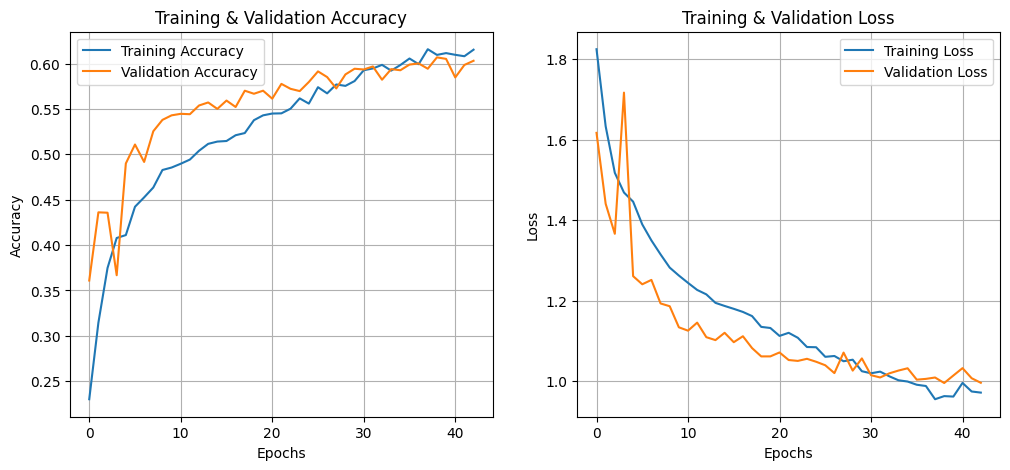

In [9]:
import matplotlib.pyplot as plt

# Retrieve training history
history = cnn_model.history

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

plt.show()
